In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import datasets  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn import tree

### Fraud Check

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
data.drop_duplicates()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

#### This data now has neither null elements or duplicate values

In [6]:
label_encoder = LabelEncoder()

In [7]:
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [8]:
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
data.drop(['City.Population'],axis = 1,inplace = True)
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [10]:
data['Target'] = pd.cut(data['Taxable.Income'],bins = [10002,30000,99620],labels = ['Risky','Good'])
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,Good
1,1,0,33700,18,1,Good
2,0,1,36925,30,1,Good
3,1,2,50190,15,1,Good
4,0,1,81002,28,0,Good
...,...,...,...,...,...,...
595,1,0,76340,7,1,Good
596,1,0,69967,2,1,Good
597,0,0,47334,0,1,Good
598,1,1,98592,17,0,Good


In [11]:
X = data.iloc[:,:-1]
X

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [12]:
Y = data['Target']
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Target, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [14]:
model = DecisionTreeClassifier()
params = {'criterion': ['entropy','gini'],
         'max_depth': np.array(range(1,15))}
grid = GridSearchCV(estimator = model , param_grid = params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
0.9958333333333333


In [16]:
final_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 1)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(167.4, 163.07999999999998, 'X[2] <= 30041.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 382\nvalue = [382, 0]')]

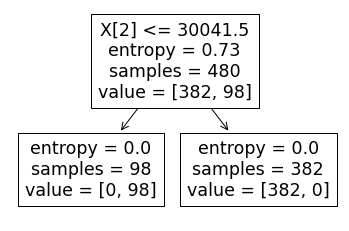

In [19]:
tree.plot_tree(final_model)

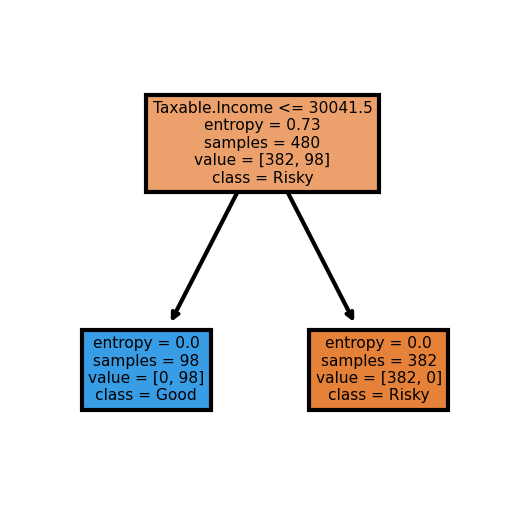

In [22]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban','Target']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(final_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
Prediction = pd.DataFrame({'Predicted' :final_model.predict(x_test),
                           'Actual' : y_test })
Prediction

,Predicted,Actual
110,Risky,Risky
419,Good,Good
565,Good,Good
77,Good,Good
181,Risky,Risky
...,...,...
399,Good,Good
340,Good,Good
148,Good,Good
494,Good,Good


In [24]:
np.mean(Prediction['Predicted']==Prediction['Actual'])

1.0

#### This model has predicted all values correctly

### Company Data

In [25]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [26]:
label_encoder = LabelEncoder()

In [27]:
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,Yes
1,11.22,111,48,16,260,83,Good,65,10,1,Yes
2,10.06,113,35,10,269,80,Medium,59,12,1,Yes
3,7.40,117,100,4,466,97,Medium,55,14,1,Yes
4,4.15,141,64,3,340,128,Bad,38,13,1,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,Yes
396,6.14,139,23,3,37,120,Medium,55,11,0,Yes
397,7.41,162,26,12,368,159,Medium,40,18,1,Yes
398,5.94,100,79,7,284,95,Bad,50,12,1,Yes


In [28]:
data['US'] = label_encoder.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [29]:
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [30]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [31]:
sales_value = []
for values in data['Sales']:
    if values < 7.5 :
        sales_value.append("low")
    else:
        sales_value.append("High")

In [32]:
data["SalesValues"] = sales_value

In [33]:
data.drop(['Sales'],axis = 1,inplace = True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesValues
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,low
397,162,26,12,368,159,2,40,18,1,1,low
398,100,79,7,284,95,0,50,12,1,1,low


In [34]:
X = data.iloc[:,:-1]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [35]:
Y = data['SalesValues']
Y

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: SalesValues, Length: 400, dtype: object

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [37]:
model = DecisionTreeClassifier()
params = {'criterion': ['entropy','gini'],
         'max_depth': np.array(range(1,41))}
grid = GridSearchCV(estimator = model , param_grid = params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [38]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 29}
0.7375


In [39]:
final_model = DecisionTreeClassifier()
final_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(96.10000000000001, 209.07692307692307, 'X[4] <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [156, 164]'),
 Text(31.0, 192.35076923076923, 'X[3] <= 253.5\ngini = 0.162\nsamples = 45\nvalue = [41, 4]'),
 Text(24.8, 175.62461538461537, 'X[5] <= 0.5\ngini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(12.4, 158.89846153846153, 'X[0] <= 124.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(6.2, 142.1723076923077, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(18.6, 142.1723076923077, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(37.2, 158.89846153846153, 'X[0] <= 101.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(31.0, 142.1723076923077, 'X[9] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(24.8, 125.44615384615385, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(37.2, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(43.4, 142.1723076923077, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(37.2, 175.62461538461537, 'gini = 0.0\nsamp

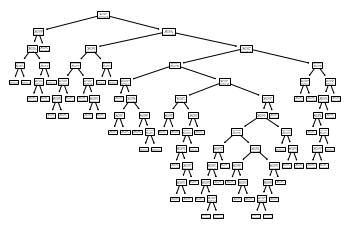

In [40]:
tree.plot_tree(final_model)

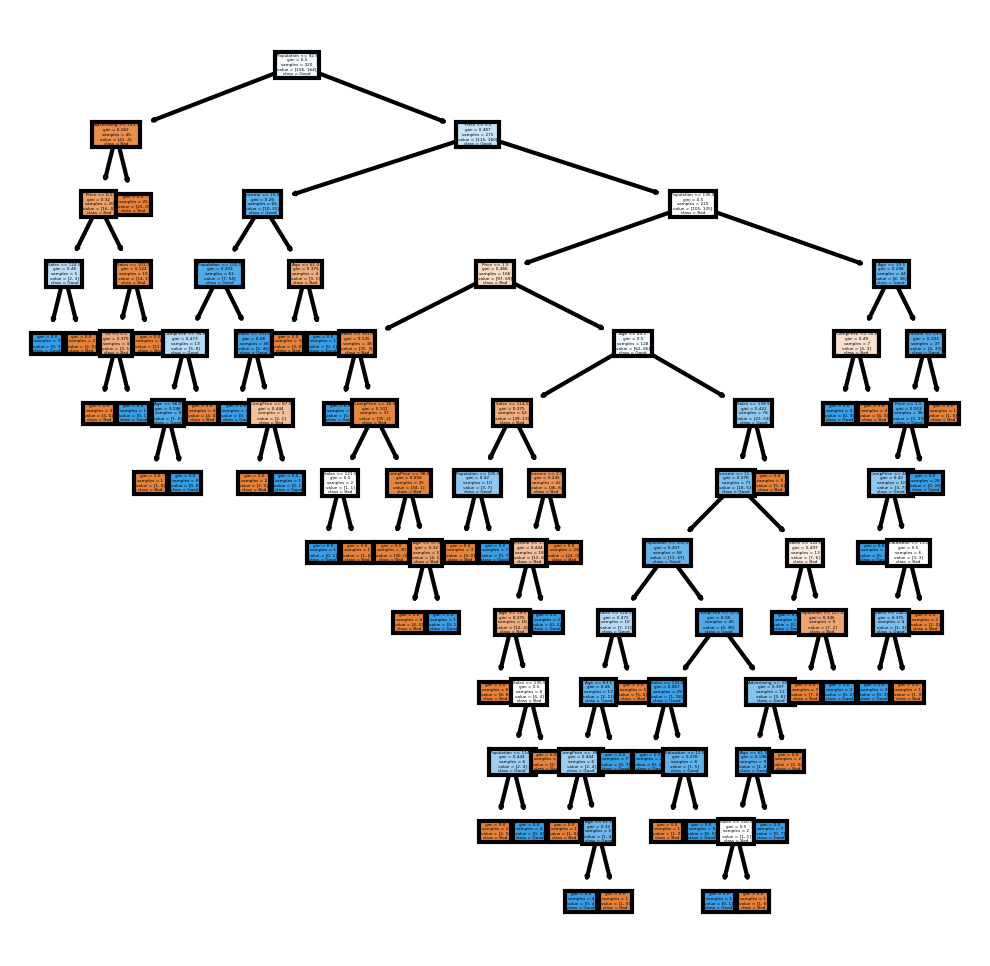

In [42]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(final_model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [149]:
Prediction = pd.DataFrame({'Predicted':final_model.predict(x_test),
                          'Actual':y_test})
Prediction

,Predicted,Actual
209,High,low
280,low,low
33,High,High
210,low,low
93,High,High
...,...,...
246,High,low
227,low,High
369,High,High
176,low,low


In [150]:
np.mean(Prediction['Predicted']==Prediction['Actual'])

0.6875

##### End of Assignment